In [1]:
from pathlib import Path
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from tqdm.auto import tqdm as tn
import cv2
from ipywidgets import interact
import ipywidgets as widgets
from PIL import Image

from pandarallel import pandarallel

tn.pandas()
pandarallel.initialize(progress_bar=True, nb_workers=os.cpu_count())

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


In [2]:
DATASET_PATH = Path("../dataset")
TRAIN_DATASET_PATH = DATASET_PATH / "train_df_with_features_v1.csv"
VAL_DATASET_PATH = DATASET_PATH / "val_df_with_features_v1.csv"
TEST_DATASET_PATH = DATASET_PATH / "test_df_with_features_v1.csv"
IMAGES_TRAIN = DATASET_PATH / "images_train"
IMAGES_TEST = DATASET_PATH / "images_test"

In [3]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
val_df = pd.read_csv(VAL_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)

In [4]:
train_df.head()

,image_url1,image_url2,is_same,image_path1,image_path2,ahash_16,phash_16_8,phash,dhash_verical_16,dhash_16,colorhash_21,colorhash_33,colorhash_63,colorhash_123,whash_16_haar,whash_16_db4,left_height,right_height,left_width,right_width
0,892325437.jpg,944751814.jpg,0,dataset/images-b1/892325437.jpg,dataset/images-b1/944751814.jpg,119.0,108.0,108.0,136.0,137.0,80.0,172.0,375.0,618.0,122.0,310.0,600.0,600.0,800.0,800.0
1,965225293.jpg,965564035.jpg,1,dataset/images-b3/965225293.jpg,dataset/images-b1/965564035.jpg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,800.0,800.0,600.0,600.0
2,892403612.jpg,927225968.jpg,0,dataset/images-b3/892403612.jpg,dataset/images-b1/927225968.jpg,115.0,126.0,126.0,120.0,96.0,59.0,97.0,184.0,277.0,114.0,222.0,600.0,600.0,800.0,800.0
3,917878082.jpg,921610429.jpg,1,dataset/images-b3/917878082.jpg,dataset/images-b2/921610429.jpg,10.0,24.0,24.0,19.0,25.0,15.0,31.0,65.0,94.0,8.0,28.0,600.0,600.0,800.0,800.0
4,907769150.jpg,921819974.jpg,0,dataset/images-b3/907769150.jpg,dataset/images-b1/921819974.jpg,73.0,100.0,100.0,107.0,114.0,51.0,93.0,185.0,284.0,76.0,116.0,800.0,600.0,600.0,800.0


In [5]:
train_df.nunique()

image_url1          65302
image_url2          66518
is_same                 2
image_path1         65302
image_path2         66517
ahash_16              208
phash_16_8             76
phash                  76
dhash_verical_16      171
dhash_16              173
colorhash_21          171
colorhash_33          293
colorhash_63          583
colorhash_123         882
whash_16_haar         129
whash_16_db4          231
left_height           878
right_height          783
left_width            945
right_width           864
dtype: int64

In [6]:
train_df.isna().sum()

image_url1             0
image_url2             0
is_same                0
image_path1            0
image_path2            1
ahash_16            1213
phash_16_8          1213
phash               1213
dhash_verical_16    1213
dhash_16            1213
colorhash_21        1213
colorhash_33        1213
colorhash_63        1213
colorhash_123       1213
whash_16_haar       1213
whash_16_db4        1220
left_height         1213
right_height        1213
left_width          1213
right_width         1213
dtype: int64

In [7]:
def create_check_equal(folder = IMAGES_TRAIN):
    def check_equal(row):
        from PIL import Image, ImageChops

        filename1, filename2 = row
        try:
            im1 = Image.open(folder / filename1)
            im2 = Image.open(folder / filename2)
            if im1.size == im2.size:
                diff = ImageChops.difference(im1, im2)
                if not diff.getbbox():
                    return 1
        except Exception:
            pass
        return 0
    return check_equal

## uncomment next 3 cells fully if you want to completely follow the results

In [8]:
# train_df["is_equal"] = train_df.loc[:, ["image_url1", "image_url2"]].parallel_apply(create_check_equal(), axis=1)

In [9]:
train_df_analysis = train_df.dropna(axis=0)
# train_df_analysis = train_df_analysis[train_df_analysis["is_equal"] == 0]

In [10]:
# train_df_analysis.to_csv(DATASET_PATH / "train_df_with_deatures_v1_analysis.csv", index=False)

In [11]:
train_df_analysis = pd.read_csv(DATASET_PATH / "train_df_with_deatures_v1_analysis.csv")

In [12]:
train_df_analysis.describe().T

,count,mean,std,min,25%,50%,75%,max
is_same,67055.0,0.274834,0.446434,0.0,0.0,0.0,1.0,1.0
ahash_16,67055.0,72.507196,48.145890,0.0,13.0,85.0,109.0,237.0
phash_16_8,67055.0,85.870494,47.585324,0.0,32.0,110.0,118.0,152.0
phash,67055.0,85.870494,47.585324,0.0,32.0,110.0,118.0,152.0
dhash_verical_16,67055.0,84.735113,48.942251,0.0,24.0,108.0,119.0,173.0
dhash_16,67055.0,87.539408,50.596854,0.0,21.0,112.0,123.0,188.0
colorhash_21,67055.0,54.302811,30.295428,0.0,27.0,55.0,76.0,182.0
colorhash_33,67055.0,89.949758,53.636159,0.0,44.0,89.0,127.0,342.0
colorhash_63,67055.0,175.953173,115.466985,0.0,76.0,171.0,256.0,708.0
colorhash_123,67055.0,268.899053,182.092608,0.0,110.0,265.0,385.0,1129.0


In [13]:
train_df_analysis["width_diff"] = np.abs(train_df_analysis["left_width"] - train_df_analysis["right_width"])
train_df_analysis["height_diff"] = np.abs(train_df_analysis["left_height"] - train_df_analysis["right_height"])


In [14]:
FEATURE_COLUMNS = list(train_df_analysis.dtypes.index[train_df_analysis.dtypes == np.float64])
TARGET_COLUMN = "is_same"

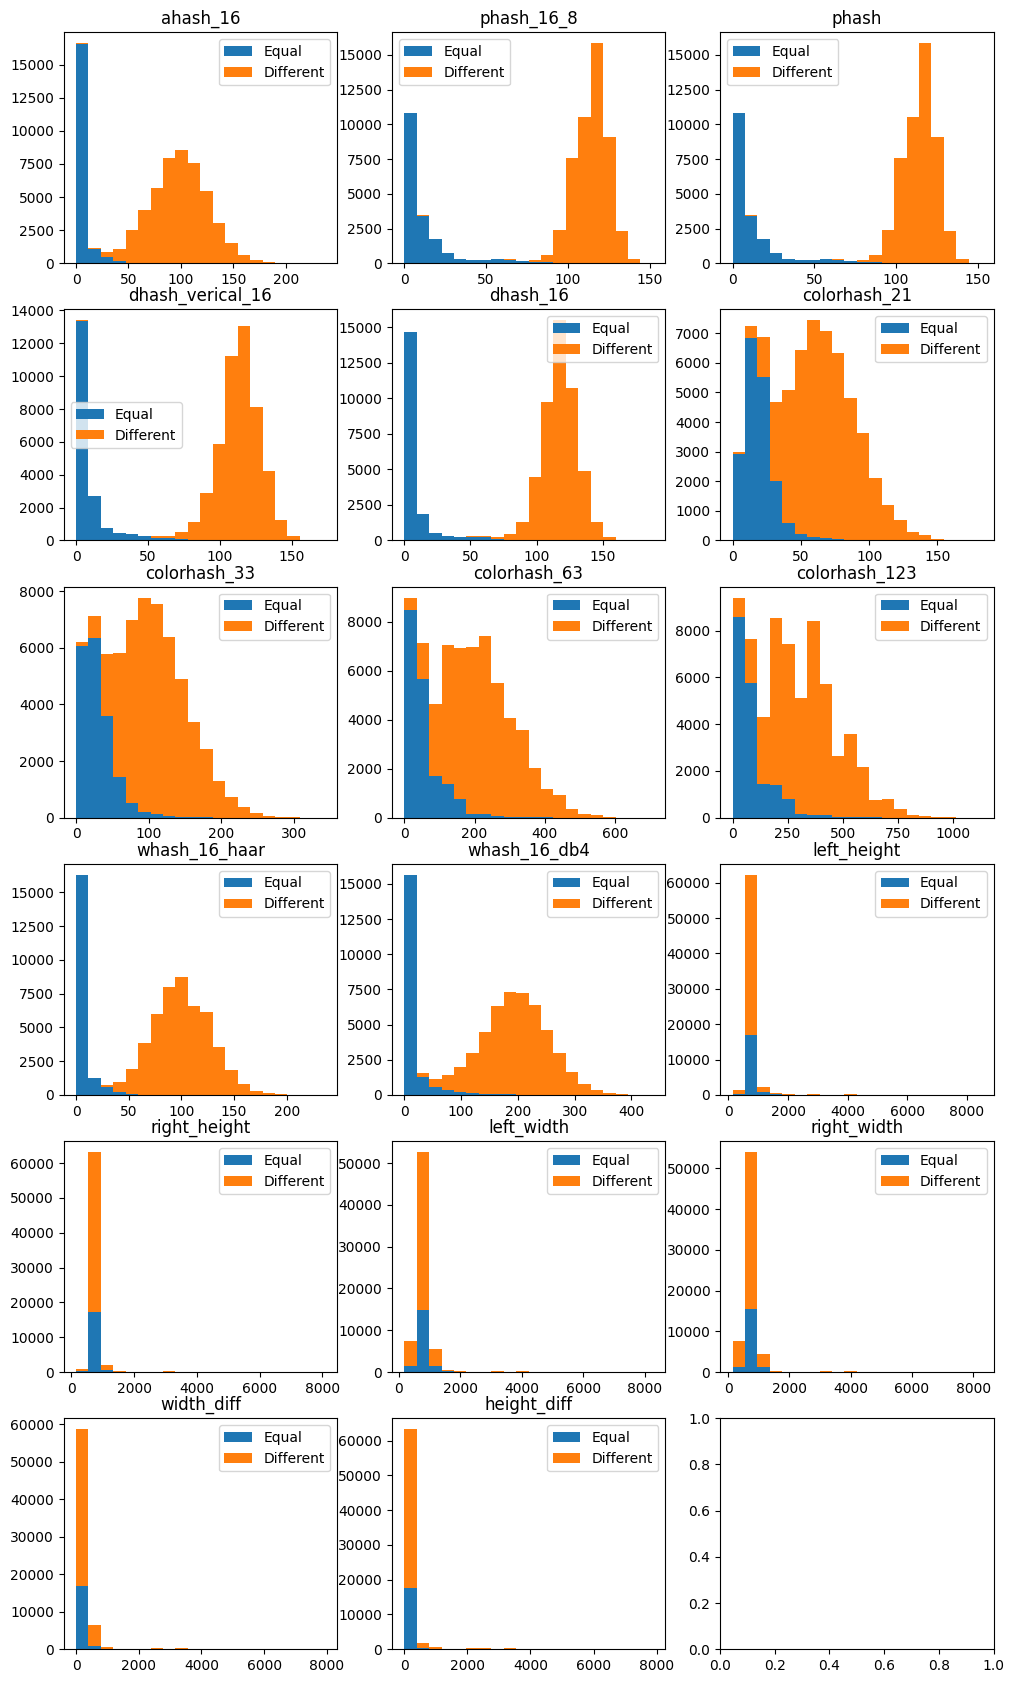

In [15]:
COLS = 3
ROWS = (len(FEATURE_COLUMNS) - 1) // COLS + 1

fig, axs = plt.subplots(ROWS, COLS, figsize=(4*COLS, 3.5*ROWS))

for i, column in enumerate(FEATURE_COLUMNS):
    axs[i // COLS, i % COLS].set_title(column)
    axs[i // COLS, i % COLS].hist([train_df_analysis[train_df_analysis[TARGET_COLUMN] == 1][column], train_df_analysis[train_df_analysis[TARGET_COLUMN] == 0][column]], 
                                  bins=20, stacked=True, label=["Equal", "Different"])
    axs[i // COLS, i % COLS].legend()

plt.show()

In [16]:
corrM = train_df_analysis[FEATURE_COLUMNS + [TARGET_COLUMN]].corr()

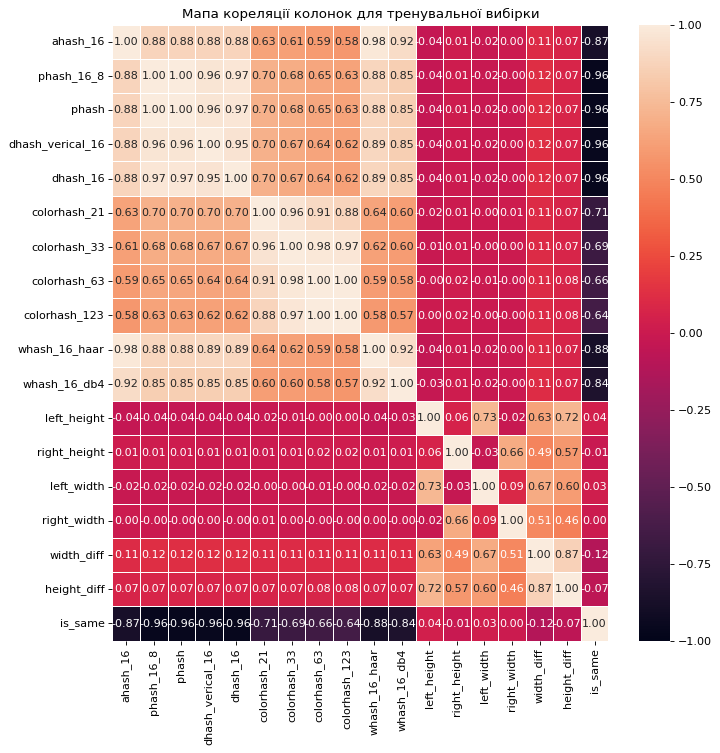

In [17]:
figure(figsize=(10, 10), dpi=80)
plt.title("Мапа кореляції колонок для тренувальної вибірки")
sns.heatmap(corrM, annot=True, fmt='.2f', linewidth=.5, vmin=-1, vmax=1)
plt.show()

In [18]:
SPLIT_COLUMN = 'phash_16_8'

In [19]:
df_notsame_similar = train_df_analysis[(train_df_analysis[SPLIT_COLUMN] < 80) & (train_df_analysis['is_same'] == 0)]
df_same_different = train_df_analysis[(train_df_analysis[SPLIT_COLUMN] > 55) & (train_df_analysis['is_same'] == 1)]

In [20]:
def create_plot_images(dataframe, title):
    def plot_images(i):
        fig, axs = plt.subplots(1, 2, figsize=(7, 4))
        fig.suptitle(title)
        row = dataframe.iloc[i]
        im1 = Image.open(IMAGES_TRAIN / row["image_url1"])
        im2 = Image.open(IMAGES_TRAIN / row["image_url2"])
        axs[0].imshow(im1)
        axs[1].imshow(im2)
        print(f"id = {dataframe.index[i]}\nphash_16_8={row['phash_16_8']}, dhash_16={row['dhash_16']}, colorhash_21={row['colorhash_21']}, whash_16_haar={row['whash_16_haar']}")
        # plt.show()
        # return fig
    
    return plot_images

In [21]:
interact(create_plot_images(df_notsame_similar, "Similar but not the same"), 
          i = widgets.IntSlider(value=0,
                                min=0,
                                max=len(df_notsame_similar) - 1,
                                step=1))

interactive(children=(IntSlider(value=0, description='i', max=106), Output()), _dom_classes=('widget-interact'…

<function __main__.create_plot_images.<locals>.plot_images(i)>

In [22]:
interact(create_plot_images(df_same_different, "Different (according to phash) but same"),
          i = widgets.IntSlider(value=0,
                                min=0,
                                max=len(df_same_different) - 1,
                                step=1))

interactive(children=(IntSlider(value=0, description='i', max=906), Output()), _dom_classes=('widget-interact'…

<function __main__.create_plot_images.<locals>.plot_images(i)>

In [124]:
def create_plot_sift(dataframe, title):
    sift = cv2.SIFT_create(contrastThreshold=0.01, edgeThreshold=20, sigma=2.0)
    FLANN_INDEX_KDTREE = 1
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks=50) # or pass empty dictionary
    flann = cv2.FlannBasedMatcher(index_params,search_params)

    def plot_sift(i):
        row = dataframe.iloc[i]

        img1 = cv2.imread(str(IMAGES_TRAIN / row["image_url1"]), cv2.IMREAD_GRAYSCALE)
        img2 = cv2.imread(str(IMAGES_TRAIN / row["image_url2"]), cv2.IMREAD_GRAYSCALE)
        kp1, des1 = sift.detectAndCompute(img1,None)
        kp2, des2 = sift.detectAndCompute(img2,None)

        matches = flann.knnMatch(des1, des2, k=2)

        # Need to draw only good matches, so create a mask
        matchesMask = [[0,0] for i in range(len(matches))]
        # ratio test as per Lowe's paper
        for i,(m,n) in enumerate(matches):
            if m.distance < 0.7*n.distance:
                matchesMask[i]=[1,0]

        similarity = 2*sum(mask[0] for mask in matchesMask)/(len(kp2) + len(kp1))
        print(f"similarity = {similarity}")

        draw_params = dict(matchColor = (0,255,0),
            singlePointColor = (255,0,0),
            matchesMask = matchesMask,
            flags = cv2.DrawMatchesFlags_DEFAULT)
        img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

        plt.imshow(img3)
        plt.title(title)
        plt.show()

    
    return plot_sift

In [125]:
interact(create_plot_sift(df_notsame_similar, "Similar but not the same, sift"), 
          i = widgets.IntSlider(value=0,
                                min=0,
                                max=len(df_notsame_similar) - 1,
                                step=1,
                                layout=widgets.Layout(width='600px')))

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='600px'), max=106), Output()), _…

<function __main__.create_plot_sift.<locals>.plot_sift(i)>

In [126]:
interact(create_plot_sift(df_same_different, "Different (according to phash) but same, sift"), 
          i = widgets.IntSlider(value=0,
                                min=0,
                                max=len(df_same_different) - 1,
                                step=1,
                                layout=widgets.Layout(width='600px')))

interactive(children=(IntSlider(value=0, description='i', layout=Layout(width='600px'), max=906), Output()), _…

<function __main__.create_plot_sift.<locals>.plot_sift(i)>

In [67]:
df_susp = train_df[(train_df[SPLIT_COLUMN] <= 90) & (train_df[SPLIT_COLUMN] >= 55)]

In [68]:
df_susp

,image_url1,image_url2,is_same,image_path1,image_path2,ahash_16,phash_16_8,phash,dhash_verical_16,dhash_16,colorhash_21,colorhash_33,colorhash_63,colorhash_123,whash_16_haar,whash_16_db4,left_height,right_height,left_width,right_width
139,916752553.jpg,926978004.jpg,0,dataset/images-b3/916752553.jpg,dataset/images-b3/926978004.jpg,85.0,82.0,82.0,109.0,105.0,60.0,95.0,188.0,283.0,94.0,158.0,3456.0,700.0,4608.0,525.0
164,904365176.jpg,906616272.jpg,0,dataset/images-b2/904365176.jpg,dataset/images-b3/906616272.jpg,27.0,80.0,80.0,32.0,109.0,61.0,81.0,140.0,205.0,34.0,80.0,800.0,700.0,600.0,525.0
217,931316901.jpg,933006481.jpg,0,dataset/images-b3/931316901.jpg,dataset/images-b3/933006481.jpg,70.0,84.0,84.0,116.0,116.0,46.0,74.0,132.0,196.0,88.0,114.0,600.0,600.0,800.0,800.0
403,921831726.jpg,924046201.jpg,1,dataset/images-b3/921831726.jpg,dataset/images-b3/924046201.jpg,25.0,62.0,62.0,42.0,60.0,15.0,31.0,55.0,85.0,32.0,78.0,600.0,600.0,800.0,800.0
450,912141349.jpg,933383782.jpg,0,dataset/images-b1/912141349.jpg,dataset/images-b2/933383782.jpg,20.0,90.0,90.0,59.0,110.0,39.0,87.0,209.0,338.0,18.0,46.0,700.0,800.0,466.0,600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72339,900378209.jpg,921636065.jpg,1,dataset/images-b1/900378209.jpg,dataset/images-b3/921636065.jpg,27.0,80.0,80.0,58.0,65.0,21.0,34.0,60.0,94.0,30.0,48.0,656.0,600.0,1000.0,800.0
72363,913230194.jpg,917416688.jpg,1,dataset/images-b1/913230194.jpg,dataset/images-b1/917416688.jpg,24.0,68.0,68.0,50.0,53.0,29.0,58.0,110.0,174.0,32.0,94.0,600.0,600.0,800.0,800.0
72436,897131903.jpg,920966919.jpg,0,dataset/images-b1/897131903.jpg,dataset/images-b1/920966919.jpg,23.0,90.0,90.0,109.0,121.0,60.0,93.0,189.0,290.0,32.0,36.0,700.0,700.0,933.0,525.0
72459,938762790.jpg,939523805.jpg,1,dataset/images-b1/938762790.jpg,dataset/images-b2/939523805.jpg,15.0,56.0,56.0,55.0,30.0,32.0,56.0,119.0,177.0,26.0,74.0,700.0,800.0,464.0,600.0


In [69]:
# df_susp = pd.concat([df_notsame_similar, df_same_different])

In [70]:
def create_sift_similarity(folder = IMAGES_TRAIN):
    # import cv2
    def sift_similarity(row):
        import cv2
        sift = cv2.SIFT_create()
        FLANN_INDEX_KDTREE = 1
        index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
        search_params = dict(checks=50)
        flann = cv2.FlannBasedMatcher(index_params, search_params)

        try:
            img1 = cv2.imread(str(folder / row["image_url1"]), cv2.IMREAD_GRAYSCALE)
            img2 = cv2.imread(str(folder / row["image_url2"]), cv2.IMREAD_GRAYSCALE)
            kp1, des1 = sift.detectAndCompute(img1,None)
            kp2, des2 = sift.detectAndCompute(img2,None)

            matches = flann.knnMatch(des1, des2, k=2)

            good_matches_count = 0
            for m, n in matches:
                if m.distance < 0.7*n.distance:
                    good_matches_count += 1

            similarity = 2*good_matches_count/(len(kp2) + len(kp1))
            return similarity
        except Exception:
            return 0
    return sift_similarity

In [71]:
df_susp["sift_similarity"] = df_susp.parallel_apply(create_sift_similarity(), axis=1)

C:\Users\Andrii\AppData\Local\Temp\ipykernel_3684\394107106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_susp["sift_similarity"] = df_susp.parallel_apply(create_sift_similarity(), axis=1)


In [94]:
from sklearn.metrics import f1_score, accuracy_score

In [106]:
res = {}
for i in np.arange(df_susp["sift_similarity"].min(), df_susp["sift_similarity"].max(), step=0.001):
    # res[i] = (f1_score(df_susp["is_same"], df_susp["sift_similarity"] > i) + f1_score(1 - df_susp["is_same"], df_susp["sift_similarity"] <= i)) / 2
    res[i] = f1_score(df_susp["is_same"], df_susp["sift_similarity"] > i)
    # res[i] = accuracy_score(df_susp["is_same"], df_susp["sift_similarity"] > i)

In [107]:
threshold = max(res, key=res.get)

res, threshold

({0.0: 0.6922741161065037,
  0.001: 0.6946999561979851,
  0.002: 0.6999117387466901,
  0.003: 0.7121688370004491,
  0.004: 0.7206551410373067,
  0.005: 0.7286108555657774,
  0.006: 0.7433129985922101,
  0.007: 0.7510668563300142,
  0.008: 0.7565758010521282,
  0.009000000000000001: 0.7642512077294685,
  0.01: 0.7743514439549681,
  0.011: 0.7766323024054983,
  0.012: 0.7816205533596837,
  0.013000000000000001: 0.7862823061630217,
  0.014: 0.7913956978489244,
  0.015: 0.7977811396873424,
  0.016: 0.8014184397163121,
  0.017: 0.8059093224656139,
  0.018000000000000002: 0.8071611253196932,
  0.019: 0.8125643666323377,
  0.02: 0.8163476461458871,
  0.021: 0.8205928237129486,
  0.022: 0.8234064785788924,
  0.023: 0.8255631220534311,
  0.024: 0.8299104791995787,
  0.025: 0.8347457627118645,
  0.026000000000000002: 0.8365180467091295,
  0.027: 0.8387440127727513,
  0.028: 0.8409818569903948,
  0.029: 0.8441349758971614,
  0.03: 0.8464017185821697,
  0.031: 0.8495956873315363,
  0.032: 0.854042

In [108]:
res[threshold]

0.9678638941398866

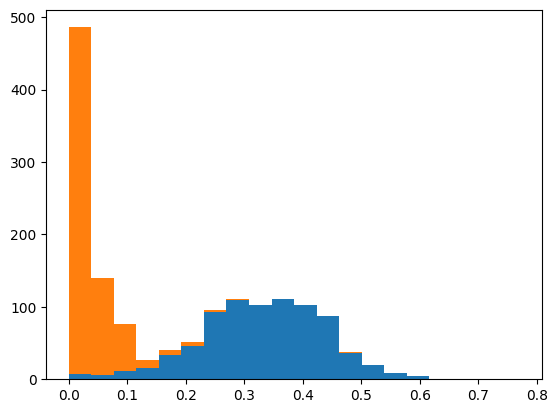

In [109]:
plt.hist([df_susp[df_susp[TARGET_COLUMN] == 1]["sift_similarity"], df_susp[df_susp[TARGET_COLUMN] == 0]["sift_similarity"]], 
                                  bins=20, stacked=True, label=["Equal", "Different"])
plt.show()

In [84]:
len(df_susp[df_susp[TARGET_COLUMN] == 1])

794

In [86]:
len(df_susp[df_susp[TARGET_COLUMN] == 0])

708